<a href="https://colab.research.google.com/github/kipsangchepesa/IPweek4-core12/blob/main/Moringa_Data_Science_Core12_W4_Independent_Project_2021_11_Kipsang_Mutai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
from statsmodels.stats import weightstats as stests
import pandas.util.testing as tm

Loading data 

In [5]:
autolibdf=pd.read_csv('http://bit.ly/DSCoreAutolibDataset')
autolibdf

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


In [7]:
#checking for data information
autolibdf.info()
print ("its has 16085 entries and a total of 13 columns")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB
its has 16085 entries and a total of 13 columns


# Checking for data validity and missing values

In [8]:
autolibdf.isnull()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,False,False,False,False,False,False,False,False,False,False,False,False,False
16081,False,False,False,False,False,False,False,False,False,False,False,False,False
16082,False,False,False,False,False,False,False,False,False,False,False,False,False
16083,False,False,False,False,False,False,False,False,False,False,False,False,False


There are no missing values in the datasets columns

In [9]:
# checking for Null columns in the dataset
autolibdf.isnull().any()
autolibdf.isnull().sum()
#there are no null columns in the dataset:


Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

# Checking for outliers


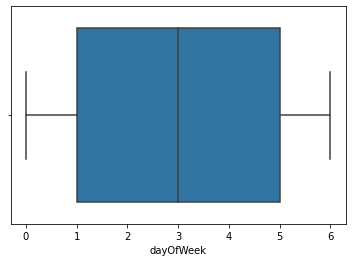

In [12]:
#checking for outliers
sns.boxplot(x=autolibdf['dayOfWeek'])

# Univeriate analysis

(array([2374., 2363.,    0., 2268.,    0., 2268., 2271.,    0., 2267.,
        2274.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

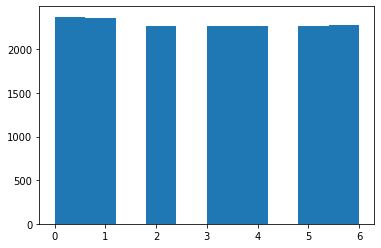

In [14]:
#Being that the service is used through out the week 
#plotting a histogram for the day of week as one variable
plt.hist(autolibdf['dayOfWeek'])

the largest traffic is found in the postal code between 90000 and 95000


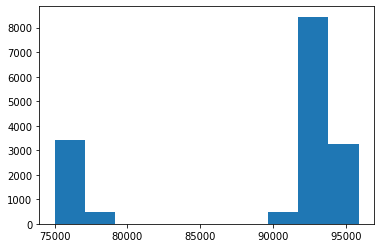

In [24]:
plt.hist(autolibdf['Postal code'])

print("the largest traffic is found in the postal code between 90000 and 95000")

AxesSubplot(0.125,0.125;0.775x0.755)
Most of the traffic are found on weekdays


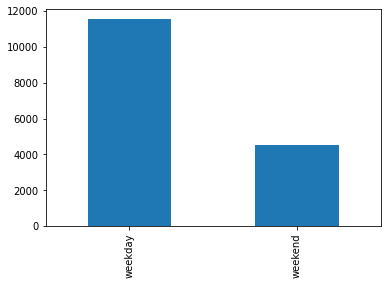

In [22]:
print(autolibdf['day_type'].value_counts().plot.bar())

print("Most of the traffic are found on weekdays")

# Bivariate analysis

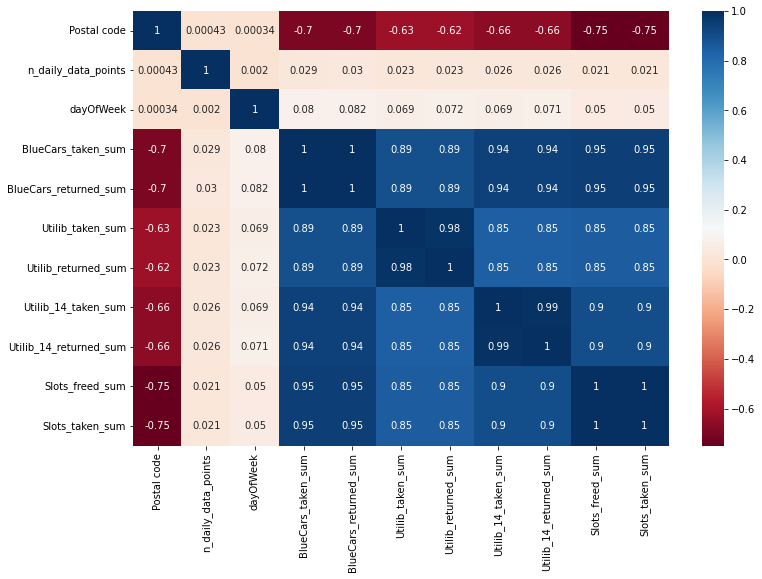

In [30]:
#visualizing the correlation of variables
plt.figure(figsize=(12, 8))

h_map =autolibdf.corr()
sns.heatmap(h_map,xticklabels = h_map.columns.values,yticklabels = h_map.columns.values,annot = True, cmap="RdBu");

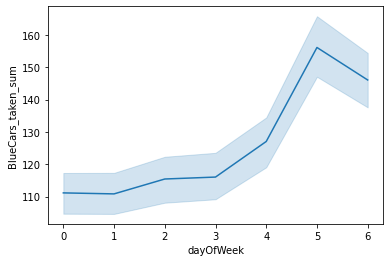

In [34]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
x=dates
y=taken
dates= autolibdf['dayOfWeek']
taken=autolibdf['BlueCars_taken_sum']
sns.lineplot(x,y)
plt.show()

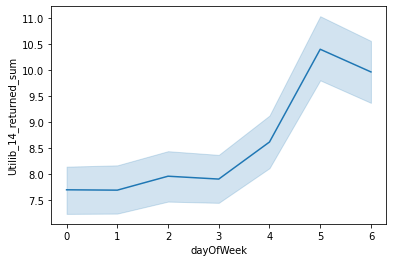

In [37]:
date= autolibdf['dayOfWeek']
slots= autolibdf['Utilib_14_returned_sum']
sns.lineplot(date,slots)
plt.show()

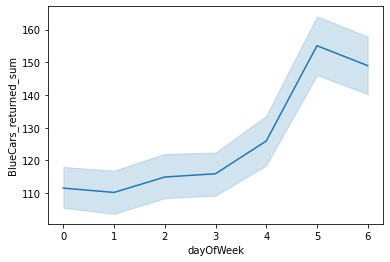

In [39]:
dates= autolibdf['dayOfWeek']
rerurn=autolibdf['BlueCars_returned_sum']
sns.lineplot(dates,rerurn)
plt.show()

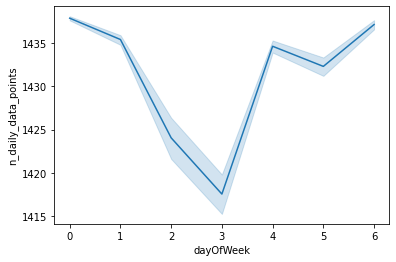

In [42]:

dates= autolibdf['dayOfWeek']
points=autolibdf['n_daily_data_points']
sns.lineplot(dates,points)
plt.show()

#number of daily data points that were available for aggregation, per day reduce on thursday which is day 3 as shown below

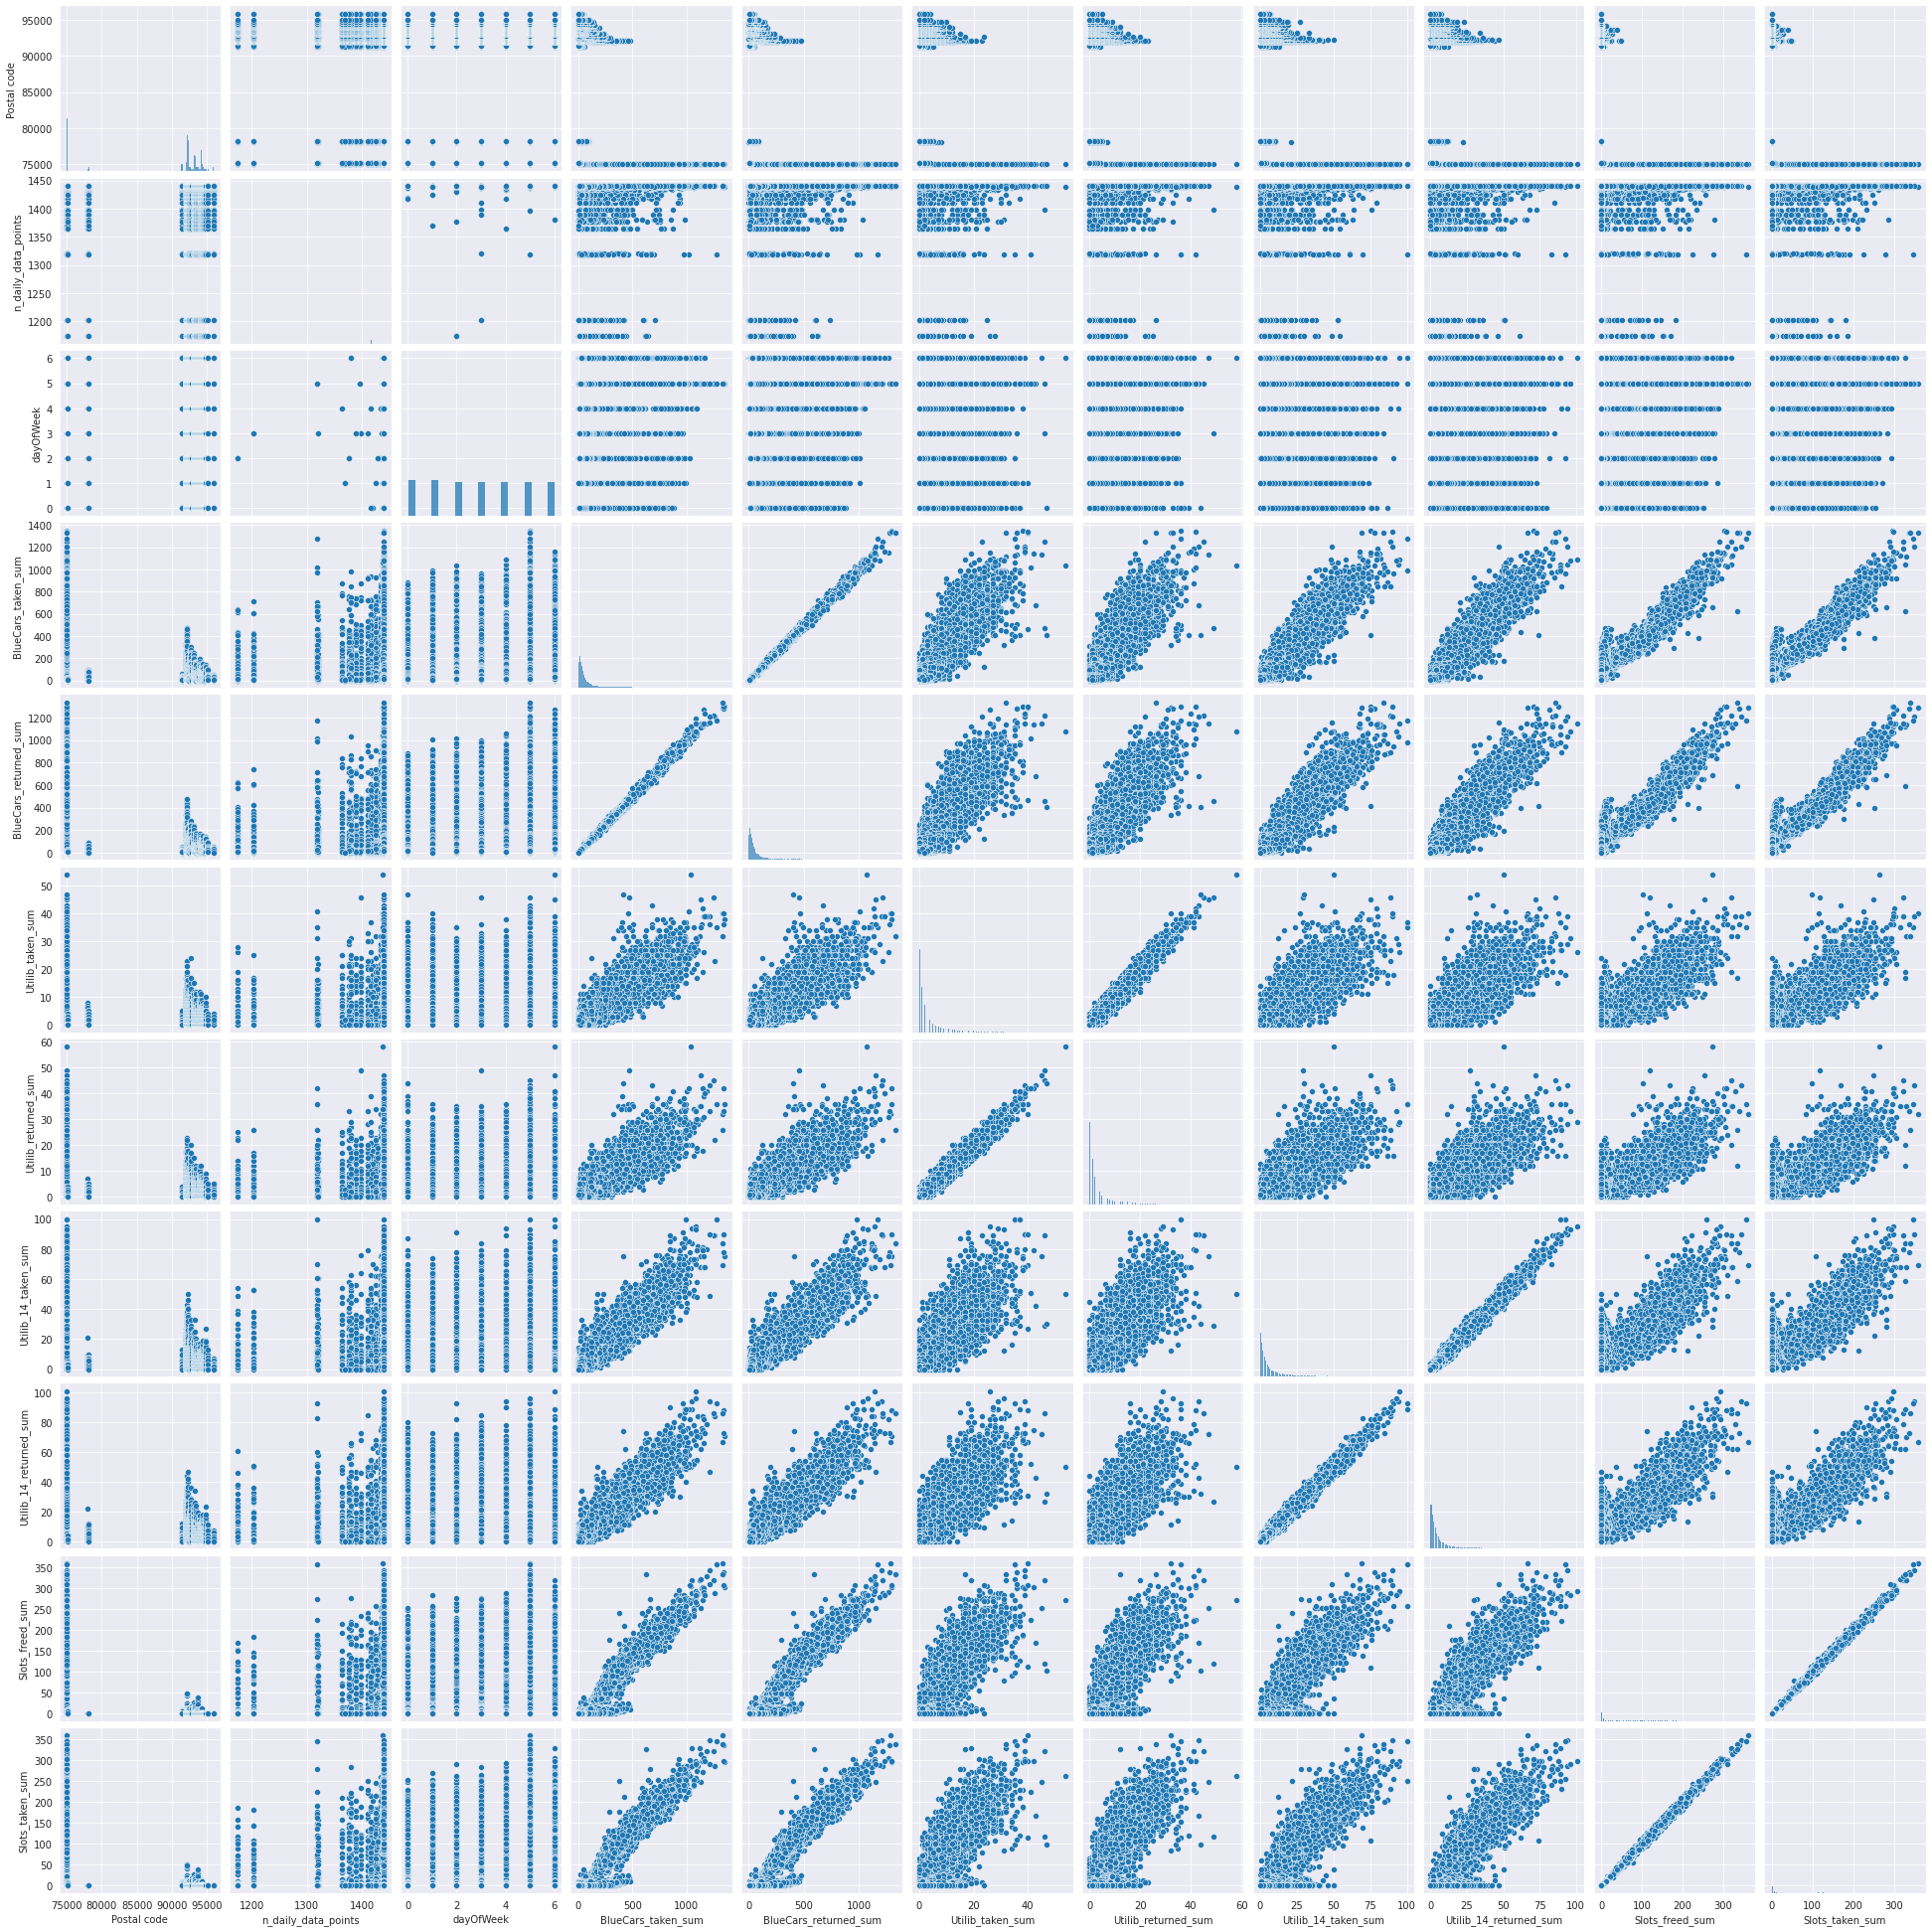

In [44]:
#using pair plot
sns.set_style("darkgrid") 
sns.pairplot(autolibdf)

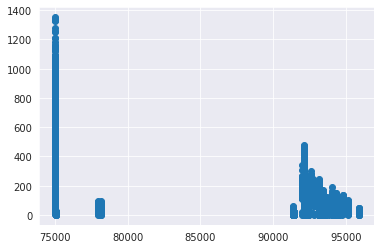

In [45]:
places=autolibdf['Postal code']
sum_taken=autolibdf['BlueCars_taken_sum']
plt.scatter(places,sum_taken)
plt.show()

# Hypothesis testing

Is the number of Bluecars taken in area X different than in area Y?

In [47]:
cardataset=pd.crosstab(autolibdf['n_daily_data_points'],autolibdf['day_type'])
print(cardataset)

day_type             weekday  weekend
n_daily_data_points                  
1174                     104        0
1203                     103        0
1318                       0      103
1320                     103        0
1364                     103        0
1370                      94        0
1377                     102        0
1380                       0      103
1389                     103        0
1396                       0       98
1398                     104        0
1411                     104        0
1417                     206        0
1420                     103        0
1425                     207        0
1429                     104        0
1434                     207        0
1435                     104        0
1436                     104        0
1437                     308      103
1438                     516      207
1439                    2269      310
1440                    6496     3617


In [48]:
autolibdf[['BlueCars_taken_sum','n_daily_data_points']].describe()

,BlueCars_taken_sum,n_daily_data_points
count,16085.000000,16085.000000
mean,125.926951,1431.330619
std,185.426579,33.212050
min,0.000000,1174.000000
25%,20.000000,1439.000000
50%,46.000000,1440.000000
75%,135.000000,1440.000000
max,1352.000000,1440.000000


In [49]:
autolibdf.groupby('day_type').count()

,Postal code,date,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
day_type,,,,,,,,,,,,
weekday,11544,11544,11544,11544,11544,11544,11544,11544,11544,11544,11544,11544
weekend,4541,4541,4541,4541,4541,4541,4541,4541,4541,4541,4541,4541


In [50]:
autolibdf.count()
#being that there is 16000 entries per columns then sampling 10% will give us n=1600

Postal code               16085
date                      16085
n_daily_data_points       16085
dayOfWeek                 16085
day_type                  16085
BlueCars_taken_sum        16085
BlueCars_returned_sum     16085
Utilib_taken_sum          16085
Utilib_returned_sum       16085
Utilib_14_taken_sum       16085
Utilib_14_returned_sum    16085
Slots_freed_sum           16085
Slots_taken_sum           16085
dtype: int64

With  16,000 rows per column therefore I will pick a representative sample of 10% which is 1600

**Null hypothesis**

> 


The number of slots taken during the weekday in **postal code** 75015 are different from ones taken in 75017.


**Alternative hypothesis**

> 


The number of slots taken during the weekday in postal code 75015 are not different from the ones taken in 75017

since we are comparing *two groups* of the **75015** and **75017**, a *T-test* will be used.

# printing the  sample 

In [51]:
sample=autolibdf.sample(n=1600,replace='False')
print(sample)

       Postal code       date  ...  Slots_freed_sum  Slots_taken_sum
15456        94700  6/15/2018  ...                0                0
7029         92270  1/13/2018  ...                0                0
14907        94410  3/14/2018  ...                0                0
4357         91400  6/10/2018  ...                0                0
545          75004  3/22/2018  ...               47               46
...            ...        ...  ...              ...              ...
9847         92800   2/6/2018  ...                4                3
3190         75112  3/15/2018  ...                2                1
8945         92400  3/14/2018  ...                6                5
8286         92360  1/31/2018  ...                0                0
13480        94120  2/16/2018  ...                0                0

[1600 rows x 13 columns]


In [52]:
#describing the sample to check for the standard deviation, mean and median
sample.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,88864.240625,1429.935625,2.989375,130.886250,130.915000,3.794375,3.793125,8.820000,8.856875,23.263750,23.173750
std,7588.975331,36.880708,1.987267,188.117183,187.854208,5.786884,5.784785,12.955887,12.940674,52.437716,52.229647
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91370.000000,1439.000000,1.000000,21.000000,21.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92330.000000,1440.000000,3.000000,48.000000,47.500000,2.000000,2.000000,4.000000,4.000000,0.000000,0.000000
75%,93370.000000,1440.000000,5.000000,143.000000,143.250000,4.000000,4.000000,10.000000,11.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1338.000000,1294.000000,43.000000,43.000000,90.000000,88.000000,308.000000,305.000000


In [56]:
#replacing white spaces with an underscore

sample.columns = autolibdf.columns.str.replace(" ", "_")
sample.columns

Index(['Postal_code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [59]:
#checking for the shape of the sample
sample.shape


(1600, 13)

In [70]:
#

hype_1 = sample[(sample.Postal_code== 75015) & (sample.day_type == 'weekday')]
hype_1

,Postal_code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
2254,75015,3/15/2018,1440,3,weekday,818,770,25,23,53,57,248,231
2275,75015,4/5/2018,1440,3,weekday,893,891,31,32,62,67,217,222
2268,75015,3/29/2018,1440,3,weekday,833,839,21,24,52,47,240,238
2319,75015,5/30/2018,1440,2,weekday,985,982,23,29,54,58,213,208
2331,75015,6/11/2018,1440,0,weekday,885,880,18,19,87,80,204,205
2192,75015,1/9/2018,1439,1,weekday,791,801,24,27,64,64,186,193
2317,75015,5/28/2018,1440,0,weekday,861,843,20,18,66,62,182,174
2321,75015,6/1/2018,1440,4,weekday,1089,1039,17,18,79,71,262,254
2311,75015,5/22/2018,1438,1,weekday,856,813,38,34,74,73,239,230
2209,75015,1/26/2018,1437,4,weekday,963,952,34,34,61,56,254,248


In [71]:
hype_2 = sample[(sample.Postal_code== 75017) & (sample.day_type == 'weekday')]
hype_2

,Postal_code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
2601,75017,4/19/2018,1203,3,weekday,602,610,25,26,35,36,135,144
2644,75017,6/12/2018,1439,1,weekday,755,763,16,15,47,48,212,213
2499,75017,1/4/2018,1320,3,weekday,553,534,16,17,30,30,141,145
2549,75017,2/23/2018,1440,4,weekday,686,676,17,17,49,54,179,180
2538,75017,2/12/2018,1440,0,weekday,604,605,12,9,48,44,163,158
2540,75017,2/14/2018,1440,2,weekday,739,709,21,19,48,56,217,212
2500,75017,1/5/2018,1440,4,weekday,705,703,12,13,40,42,179,180
2542,75017,2/16/2018,1439,4,weekday,723,720,19,17,50,57,204,206
2552,75017,3/1/2018,1389,3,weekday,740,706,16,15,36,36,166,166
2551,75017,2/28/2018,1429,2,weekday,629,655,19,17,36,37,162,167


In [72]:
hype_1['Slots_taken_sum'].mean()

220.3

In [73]:
hype_2['Slots_taken_sum'].mean()

178.0

In [74]:
hype_1['Slots_taken_sum'].describe()

count     10.00000
mean     220.30000
std       25.17075
min      174.00000
25%      205.75000
50%      226.00000
75%      236.25000
max      254.00000
Name: Slots_taken_sum, dtype: float64

In [75]:
hype_2['Slots_taken_sum'].describe()

count     12.000000
mean     178.000000
std       25.312591
min      144.000000
25%      160.250000
50%      173.500000
75%      204.500000
max      213.000000
Name: Slots_taken_sum, dtype: float64

In [89]:
# T-test for the two groups
for_one= hype_1['Slots_taken_sum']
for_two= hype_2['Slots_taken_sum']
stats.ttest_ind(a=for_one,b=for_two)



Ttest_indResult(statistic=3.912711729994486, pvalue=0.0008627610089268364)

In [90]:
pvalue=0.0008627610089268364
if pvalue<0.05:
       print("reject null hypothesis")
else:
       print("accept null hypothesis")

reject null hypothesis
